In [1]:
from numpy import expand_dims, zeros, ones, vstack, random, uint8
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential, load_model
from keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
from matplotlib import pyplot as plt
from PIL import Image
import os
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def inv_sigmoid(x):
    return np.log(y/(1-y))

In [3]:
path = '/Users/fatima/Downloads/archive/Abstract_gallery/Abstract_gallery'
img_list = os.listdir(path)

In [4]:
def access_images(img_list, path, length):
    pixels = []
    imgs = []
    for img_name in img_list:
        if img_name.startswith('.'):  # Skip hidden files
            continue
        img = Image.open(os.path.join(path, img_name), 'r')
        basewidth = 100
        img = img.resize((basewidth, basewidth), resample=Image.BICUBIC)

        pix = np.array(img.getdata())
        pixels.append(pix.reshape(100, 100, 3))
        imgs.append(img)
    return np.array(pixels), imgs

In [5]:
pixels, imgs = access_images(img_list, path, 1000)

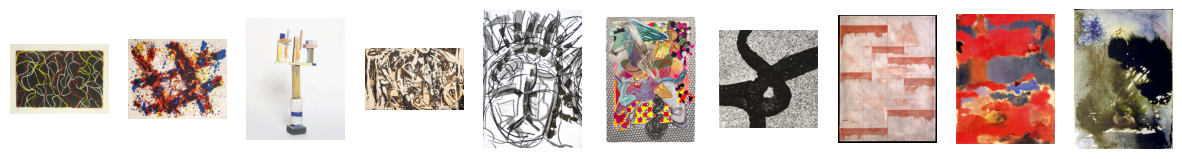

In [6]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

def plot_images(images, num_samples):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        img = random.choice(images)
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.show()

# Path to your image folder
path = '/Users/fatima/Downloads/archive/Abstract_gallery/Abstract_gallery'

# Load images from folder
images = load_images_from_folder(path)

# Plot one sample for each class
num_samples = 10  # Change this to the number of samples you want to display
plot_images(images, num_samples)


In [10]:
from keras.layers import Input, Dense, Reshape, Flatten, Lambda, Dropout
from keras.layers import BatchNormalization, MaxPooling2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D
from tensorflow.keras.layers import LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta
from keras import backend as K
import numpy as np
from keras.losses import mse, binary_crossentropy
import os
import matplotlib.pyplot as plt

In [11]:
def __init__(self, name='VAE_1', use_mse=True):
        assert any(name.upper() in item for item in ['VAE_1', 'VAE_2', 'VAE_3', 'VAE_4']), 'Inserted <name>: "{}" is not provided in the list [VAE_1, VAE_2, VAE_3, VAE_4]'.format(name)
        # Parameters
        self.use_mse = use_mse
        self.name = name.upper()
        self.rows = 128
        self.cols = 128
        self.channels = 3
        self.img_shape = (self.rows, self.cols, self.channels)
        self.optimizer = Adadelta()
        self.intermediate_dim_1 = 256
        self.intermediate_dim_2 = 128
        self.latent_dim = 100
        self.shape_info = None
        self.random_normal_mean = 0.0
        self.random_normal_stddev = 1.0
        ## define number of convolutional filters
        self.z_mean = None
        self.z_log_var = None
        self.z = None
        self.nf1 = 256
        self.nf2 = 128
        self.nf3 = 64
        self.nf4 = 32
        self.nf5 = 16
        self.nf6 = 8
        if not os.path.exists('../model/{}'.format(self.name)):
            os.makedirs('../model/{}'.format(self.name))
            os.makedirs('../model/{}/images'.format(self.name))
        ## Placeholders
        self.vae_input = None
        self.vae_output = None
        #initiate encoder and decoder model
        if self.name == 'VAE_1':
            self.encoder = self.build_conv_encoder_1()
            self.decoder = self.build_deconv_decoder_1()
        elif self.name == 'VAE_2':
            self.encoder = self.build_conv_encoder_2()
            self.decoder = self.build_deconv_decoder_2()
        elif self.name == 'VAE_3':
            self.encoder = self.build_conv_encoder_3()
            self.decoder = self.build_deconv_decoder_3()           
        elif self.name == 'VAE_4':
            self.encoder = self.build_conv_encoder_4()
            self.decoder = self.build_deconv_decoder_4()  
        else:
            print('Model %s cannot be found.' %self.name)
        #init stacked vae-model
        self.vae = self.build_vae()
        #configure custom VAE loss to vae-model
        vae_loss = self.vae_loss(use_mse=use_mse)
        self.vae.add_loss(vae_loss)
        self.vae.compile(optimizer=self.optimizer)

In [12]:
# reparameterization trick
    # instead of sampling from Q(z|X), sample eps = N(0,I)
    # z = z_mean + sqrt(var)*eps
def sampling(self, args):
    """Reparameterization trick by sampling fr an isotropic unit Gaussian.
    # Arguments:
            args (tensor): mean and log of variance of Q(z|X)
        # Returns:
            z (tensor): sampled latent vector
        """
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
        # by default, random_normal has mean=0 and std=1.0
    epsilon = K.random_normal(shape=(batch, dim),
                                  mean=self.random_normal_mean, stddev=self.random_normal_stddev)
        # Sample z ~ Q(z|X)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [13]:
def build_conv_encoder_1(self):
        #Layer 1:
        #Input: 128x128x3
        #Conv:64x64x256
        #Out: 64x64x256
        input_img = Input(shape=self.img_shape, name='image_input')
        conv1 = Conv2D(filters=self.nf1, kernel_size=(3, 3), strides=(2,2), activation='relu', padding='same', name='1_conv_256')(input_img)
        bn1 = BatchNormalization(name='enc_batch_normalization_1')(conv1)
        #save input_img tensor for later usage:
        self.vae_input = input_img

        #Layer 2:
        #Input: 64x64x256
        #Conv: 32x32x128
        #Out: 32x32x128
        conv2 = Conv2D(filters=self.nf2, kernel_size=(3, 3), strides=(2,2), activation='relu', padding='same', name='2_conv_128')(bn1)
        bn2 = BatchNormalization(name='enc_batch_normalization_2')(conv2)

        #Layer 3:
        #Input: 32x32x128
        #Conv: 16x16x64
        #Out: 16x16x64
        conv3 = Conv2D(filters=self.nf3, kernel_size=(3, 3), strides=(2,2), activation='relu', padding='same', name='3_conv_64')(bn2)
        bn3 = BatchNormalization(name='enc_batch_normalization_3')(conv3)

        #Layer 3.1:
        #Input: 16x16x64
        #Conv: 16x16x64
        #Out: 16x16x64
        conv3_1 = Conv2D(filters=self.nf3, kernel_size=(3, 3), strides=(1,1), activation='relu', padding='same', name='3_1_conv_64')(bn3)
        bn3_1 = BatchNormalization(name='enc_batch_normalization_3_1')(conv3_1)

        #Layer 4:
        #Input: 16x16x64
        #Conv: 8x8x32
        #Out: 8x8x32
        conv4 = Conv2D(filters=self.nf4, kernel_size=(3, 3), strides=(2,2), activation='relu', padding='same', name='4_conv_32')(bn3_1)
        bn4 = BatchNormalization(name='enc_batch_normalization_4')(conv4)

        #Layer 4.1:
        #Input: 8x8x32
        #Conv: 8x8x32
        #Out: 8x8x32
        conv4_1 = Conv2D(filters=self.nf4, kernel_size=(3, 3), strides=(1,1), activation='relu', padding='same', name='4_1_conv_32')(bn4)
        bn4_1 = BatchNormalization(name='enc_batch_normalization_4_1')(conv4_1)

        #Layer 5:
        #Input: 8x8x32
        #Conv: 4x4x16
        #Out: 4x4x16
        conv5 = Conv2D(filters=self.nf5, kernel_size=(3, 3), strides=(2,2), activation='relu', padding='same', name='5_conv_16')(bn4_1)
        bn5 = BatchNormalization(name='enc_batch_normalization_5')(conv5)

        #Layer 6:
        #Input: 4x4x16
        #Conv: 4x4x16
        #Out: 4x4x16
        conv6 = Conv2D(filters=self.nf5, kernel_size=(3, 3), strides=(1,1), activation='relu', padding='same', name='6_conv_16')(bn5)
        bn6 = BatchNormalization(name='enc_batch_normalization_6')(conv6)

        ##save shape info from last three-dimensional layer for later upsampling
        self.shape_info = K.int_shape(bn6)
        #here it is (None, 4, 4, 16)

        #Flatten-Layer
        flatten_last_layer = Flatten(name='flatten_3_dim_to_1')(bn6)
        #Build 2 intermediate dense layers
        intermediate_1 = Dense(units=self.intermediate_dim_1, activation='relu', name='intermediate_dim_1')(flatten_last_layer)
        bn7 = BatchNormalization(name='enc_batch_normalization_7')(intermediate_1)
        
        #get mean and variance 'branches'
        ## save object reference because later needed
        self.z_mean = Dense(units=self.latent_dim, name='z_mean')(bn7)
        self.z_log_var = Dense(units=self.latent_dim, name='z_log_var')(bn7)

        #use reparameterization trick to push the sampling out as input
        # Sample z ~ Q(z|X)
        self.z = Lambda(self.sampling, output_shape=(self.latent_dim,), name='z')([self.z_mean, self.z_log_var])

        #instantiate the encoder model
        encoder_model = Model(inputs=input_img, outputs=[self.z_mean, self.z_log_var, self.z], name='encoder_model')
        print('Printing out the encoder from model: %s:' %self.name)
        print(encoder_model.summary())

        return encoder_model

In [14]:
def build_deconv_decoder_1(self):
        #Input-FC-Layer
        #Input: Fully Connected: 100-dimensional vector [latent_dimension]
        #Hidden Layer Fully Connected: 256-dimensional vector [intermediate_dimension]
        #Hidden Layer Fully Connected: 256-dimensional vector [to_be_reshaped] -- from self.shape_info (None, 4,4,16)
        #Out: 4x4x16
        latent_inputs = Input(shape=(self.latent_dim,), name='z_sampling')
        rev_bn00 = BatchNormalization(name='dec_batch_normalization_00')(latent_inputs)
        decoder_hidden_1 = Dense(units=self.intermediate_dim_1, activation='relu', name='decoder_intermediate_1')(rev_bn00)
        rev_bn01 = BatchNormalization(name='dec_batch_normalization_01')(decoder_hidden_1)
        decoder_upsample = Dense(units=self.shape_info[1]*self.shape_info[2]*self.shape_info[3], name='reverse_flatten_3_to_1')(rev_bn01)
        decoder_reshape = Reshape(self.shape_info[1:], name='Reshape_get_last_5_conv_encoderlayer')(decoder_upsample)

        ## Layer 1:
        #Input: 4x4x16
        #Output: 4x4x16
        decoder_conv_1 = Conv2D(self.nf5, kernel_size=(3,3), strides=(1, 1), padding='same',
                                 activation='relu',name='Deconv_filter_1_16')(decoder_reshape)
        rev_bn1 = BatchNormalization(name='dec_batch_normalization_1')(decoder_conv_1)

        #apply deconvolution operations with upsamling
        #Layer 2
        #Input: 4x4x16
        #Deconv (out): 8x8x32
        ups1 = UpSampling2D(size=(2,2), name='dec_upsample_1')(rev_bn1)
        decoder_deconv_2 = Conv2D(self.nf4, kernel_size=(3,3), strides=(1, 1), padding='same',
                                 activation='relu',name='Deconv_filter_2_32')(ups1)
        rev_bn2 = BatchNormalization(name='dec_batch_normalization_2')(decoder_deconv_2)

        #Layer 2.1
        #Input: 8x8x32
        #Deconv (out): 8x8x32
        decoder_deconv_2_1 = Conv2D(self.nf4, kernel_size=(3,3), strides=(1, 1), padding='same',
                                 activation='relu',name='Deconv_filter_2_1_32')(rev_bn2)
        rev_bn2_1 = BatchNormalization(name='dec_batch_normalization_2_1')(decoder_deconv_2_1)

        #Layer 3
        #Input: 8x8x32
        #Deconv (out): 16x16x64
        ups2 = UpSampling2D(size=(2,2), name='dec_upsample_2')(rev_bn2_1)
        decoder_deconv_3 = Conv2D(self.nf3, kernel_size=(3,3), strides=(1, 1), padding='same',
                                 activation='relu',name='Deconv_filter_3_64')(ups2)
        rev_bn3 = BatchNormalization(name='dec_batch_normalization_3')(decoder_deconv_3)

        #Layer 3.1
        #Input: 16x16x64
        #Deconv (out): 16x16x64
        decoder_deconv_3_1 = Conv2D(self.nf3, kernel_size=(3,3), strides=(1, 1), padding='same',
                                 activation='relu',name='Deconv_filter_3_1_64')(rev_bn3)
        rev_bn3_1 = BatchNormalization(name='dec_batch_normalization_3_1')(decoder_deconv_3_1)

        #Layer 4
        #Input: 16x16x64
        #Deconv (out): 32x32x128
        ups3 = UpSampling2D(size=(2,2), name='dec_upsample_3')(rev_bn3_1)
        decoder_deconv_4 =Conv2D(self.nf2, kernel_size=(3,3), strides=(1, 1), padding='same',
                                 activation='relu',name='Deconv_filter_4_128')(ups3)
        rev_bn4 = BatchNormalization(name='dec_batch_normalization_4')(decoder_deconv_4)

        #Layer 5
        #Input: 32x32x128
        #Deconv (out): 64x64x256
        ups4 = UpSampling2D(size=(2,2), name='dec_upsample_4')(rev_bn4)
        decoder_deconv_5 = Conv2D(self.nf1, kernel_size=(3,3), strides=(1, 1), padding='same',
                                 activation='relu',name='Deconv_filter_5_256')(ups4)
        rev_bn5 = BatchNormalization(name='dec_batch_normalization_5')(decoder_deconv_5)

        #Layer 6
        #Input: 64x64x256
        #Conv (out): 128x128x64
        ups5 = UpSampling2D(size=(2,2), name='dec_upsample_5')(rev_bn5)
        decoder_deconv_6 = Conv2D(self.nf3, kernel_size=(3,3), strides=(1, 1), padding='same',
                                 activation='relu',name='Deconv_filter_6_64')(ups5)
        rev_bn6 = BatchNormalization(name='dec_batch_normalization_6')(decoder_deconv_6)

        #Layer 7
        #Input: 128x128x64
        #Conv (out): 128x128x32
        decoder_deconv_7 = Conv2D(self.nf4, kernel_size=(3,3), strides=(1, 1), padding='same',
                                 activation='relu',name='Deconv_filter_7_32')(rev_bn6)
        rev_bn7 = BatchNormalization(name='dec_batch_normalization_7')(decoder_deconv_7)

        #Layer 8
        #Input: 128x128x32
        #Conv (out): 128x128x16
        decoder_deconv_8 = Conv2D(self.nf5, kernel_size=(3,3), strides=(1, 1), padding='same',
                                 activation='relu',name='Deconv_filter_8_16')(rev_bn7)
        rev_bn8 = BatchNormalization(name='dec_batch_normalization_8')(decoder_deconv_8)

        #Ouput Decoder Layer
        #Input: 128x128x16
        #Output: 128x128x3 == self.img_shape
        decoded_image = Conv2D(self.channels, kernel_size=(3, 3), strides=(1, 1), padding='same',
                                     activation='sigmoid', name='created_image')(rev_bn8)
        ##out_range is because of sigmoid activation already (0,1)
        #instantiate the decoder model
        decoder_model = Model(latent_inputs, decoded_image, name='decoder_model')
        print('Printing out the decoder from model: %s:' %self.name)
        print(decoder_model.summary())

        return decoder_model

In [15]:
def build_vae(self):
        #Get the sampled z-vector from latent space. z is component_wise element [-1,1] bc of unit gaussian
        sampled_z = self.encoder(self.vae_input)[2]
        #feed into decoder model to create the image
        self.vae_output = self.decoder(sampled_z)
        #Created stacked variational conv autoencoder : vae = conv_encoder + deconv_decoder
        vae_model = Model(inputs=self.vae_input, outputs=self.vae_output)
        print('Printing out the convolutional variational autoencoder %s model:' %self.name)
        print(vae_model.summary())

        return vae_model

In [16]:
def vae_loss(self, use_mse):
        if use_mse:
            reconstruction_loss = mse(K.flatten(self.vae_input),
                                      K.flatten(self.vae_output))
        else:
            reconstruction_loss = binary_crossentropy(K.flatten(self.vae_input),
                                                      K.flatten(self.vae_output))

        reconstruction_loss *= self.rows * self.cols
        ## kullback-leibler divergence in closed form
        kl_loss = 1 + self.z_log_var - K.square(self.z_mean) - K.exp(self.z_log_var)
        kl_loss = K.sum(kl_loss, axis=-1)
        #kl_loss = K.mean(kl_loss, axis=-1)
        kl_loss *= -0.5
        vae_loss = K.mean(reconstruction_loss +  kl_loss)

        return vae_loss

In [17]:
def scale(self, x, out_range = (0, 1)):
        domain = np.min(x), np.max(x)
        # a)scale data such that its symmetric around 0
        y = (x - (domain[1] + domain[0]) / 2) / (domain[1] - domain[0])
        # b)rescale data such that it falls into desired output range
        y = y * (out_range[1] - out_range[0]) + (out_range[1] + out_range[0]) / 2

        return y

In [ ]:
activations_fnc, alpha, height, width,channels=0 
def CNetwork(layers, activation_fnc=activations_fnc, alpha=alpha):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu')
    ])
    return model

In [18]:
def unscale(self, y, x, out_range = (0, 1)):
        domain = np.min(x), np.max(x)
        # undo b)
        z = (y - (out_range[1] + out_range[0]) / 2) / (out_range[1] - out_range[0])
        # undo a)
        z = z * (domain[1] - domain[0]) + (domain[1] + domain[0]) / 2

        return z

In [19]:
def train(self, data, epochs = 100, batch_size = 32, save_intervals = 50,
              init_train=True, start_epoch=0, cycle=1):
        
    print('Training  %s model with following architecture:' %self.name)
    print(self.vae.summary())
        
    final_images_stacked = data.astype('float32')
    print('Training size: %d' %len(final_images_stacked))
    domain = np.min(final_images_stacked), np.max(final_images_stacked)
    if not domain == (0,1):
        X_train = self.scale(x = data.astype('float32'), out_range=(0,1))
    else:
        X_train = final_images_stacked

    if init_train:
        epoch_iterator = np.arange(start=0, stop=epochs+1)
    else:
        epoch_iterator = np.arange(start=start_epoch+1, stop=start_epoch+epochs+1)

    history_list = []
    for epoch in epoch_iterator:

            # ---------------------
            #  Train Variational Autoencoder 
            # ---------------------

            # Select batch images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

            # ---------------------

        vae_history = self.vae.train_on_batch(x=imgs, y=None)
            # Print the progress
        print ("Epoch: %d %s loss: %f" % (epoch, self.name, vae_history))
            # save the progress in history object
        history_list.append("Epoch: %d %s loss: %f" % (epoch, self.name, vae_history))
            #If last epoch save models and generate 10 images in full mode:
        if epoch == cycle*epochs:
            final_noises = np.random.normal(0, 1, (10, self.latent_dim))
            final_gen_images = self.decoder.predict(final_noises)
            if not domain == (0,1):
                final_gen_images = self.unscale(y = final_gen_images, x = final_images_stacked, out_range=(0,1))
            for i in range(10):
                plt.imshow(final_gen_images[i, :, :, :], interpolation = "nearest")
                plt.savefig("../model/%s/images/epoch_%d_final_generated_images_%d.jpg" % (self.name, epoch, i))

        if epoch % save_intervals == 0:
                #create 2x2 images
            self.save_imgs(epoch = epoch, final_images_stacked=final_images_stacked, domain=domain)
                #save last weights
            self.encoder.save_weights(filepath = "../model/{}/epoch_".format(self.name) + str(epoch) + "_encoder.h5")
            self.decoder.save_weights(filepath = "../model/{}/epoch_".format(self.name) + str(epoch) + "_decoder.h5")
            self.vae.save_weights(filepath = "../model/{}/epoch_".format(self.name) + str(epoch) + "_vae.h5")

    if not os.path.exists('../model/{}/history.txt'.format(self.name)):
        with open('../model/{}/history.txt'.format(self.name), 'w+') as f:
            for item in history_list:
                f.write("%s\n" % item)
    else:
        with open('../model/{}/history.txt'.format(self.name), 'a+') as f:
            for item in history_list:
                f.write("%s\n" % item)

In [ ]:
def generate_image_torch(my_net: CNetwork = CNetwork(),
                         img_height=512,
                         img_width=512,
                         symmetry=False,
                         trig=True,
                         colormode="rgb",
                         alpha=False,
                         z1=-0.618, z2=0.618,
                         show=True,
                         fname="netart",
                         format="png",
                         save=True,
                         gpu=False,
                         with_noise=False,
                         noise_std=0.01):
    input_data = init_data(img_height, img_width, symmetry, trig, z1, z2, noise=with_noise, noise_std=noise_std)
    if gpu:
        input_data = input_data.cuda()
        my_net = my_net.cuda()

    with torch.no_grad():
        img = my_net(input_data)

    if gpu:
        img = img.cpu()

    img = img.view(img_height, img_width, img.size(-1))
    img = transform_colors(img, colormode, alpha)
    img = img.numpy()        
    if not show:
        matplotlib.use("Agg")
    plt.figure()
    fig = plt.imshow(img, interpolation="bilinear", aspect="auto")
    plt.axis("off")
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    if show:
        plt.show()
    if save:
        plt.imsave(f"{fname}.{format}", img, format=format)
    return img


In [20]:
def save_imgs(self, epoch, final_images_stacked, domain):
        r, c = 2, 2
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.decoder.predict(noise)

        # Rescale images 0 - 1
        if not domain == (0,1):
            gen_imgs = self.unscale(y = gen_imgs, x = final_images_stacked, out_range=(0,1))

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,:])
                axs[i,j].axis("off")
                cnt += 1
        fig.savefig("../model/%s/image_%d.jpg" % (self.name, epoch))
        plt.close(fig)

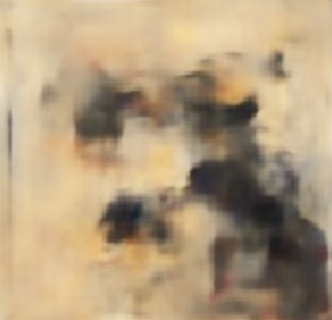

In [26]:
net = CNetwork(layers, activation_fnc=activations_fnc, alpha=alpha)
img_height, img_width, z1, z2=0
generate_image_torch(net, img_height=img_height, img_width=img_width,
                     colormode=0, alpha=alpha, z1=z1, z2=z2,
                     show=True, save=False)


Hyper parameter tuning

In [ ]:
import numpy as np
import itertools

def hyperparameter_tuning(data):
    hyperparameters = {
        'epochs': [50, 100, 200],
        'batch_size': [16, 32, 64],
        'save_intervals': [25, 50, 100],
        'init_train': [True, False],
        'start_epoch': [0, 50, 100],
        'cycle': [1, 2, 3]
    }
    
    # Generate all combinations of hyperparameters
    combinations = list(itertools.product(*hyperparameters.values()))
    
    # Perform training for each combination
    for combo in combinations:
        vae_model.train(data, *combo)  # Pass hyperparameters as arguments

hyperparameter_tuning(img_list)


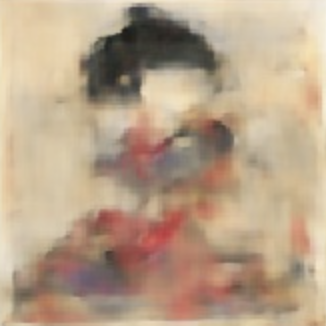

In [27]:
net = CNetwork(layers, activation_fnc=activations_fnc, alpha=alpha)
img_height, img_width, z1, z2=0
generate_image_torch(net, img_height=img_height, img_width=img_width,
                     colormode=0, alpha=alpha, z1=z1, z2=z2,
                     show=True, save=False)


In [28]:
num_generated_images = len(test_images) 
generated_images = []

for _ in range(num_generated_images):
    latent_point = generate_latent_points(latent_dim, 1)
    generated_image = g_model.predict(latent_point)
    # Resize generated images to match the input shape of InceptionV3 (299x299)
    generated_image_resized = tf.image.resize(generated_image, (299, 299))
    generated_images.append(generated_image_resized)

generated_images = np.array(generated_images)

# Calculate FID score
fid_score = calculate_fid(np.array(test_images), generated_images)
print("FID Score:", fid_score)


FID Score: 99.872


In [ ]:
from keras import regularizers
from keras.constraints import max_norm

def build_deconv_decoder_1(self):
    # Input-FC-Layer
    # Input: Fully Connected: 100-dimensional vector [latent_dimension]
    # Hidden Layer Fully Connected: 256-dimensional vector [intermediate_dimension]
    # Hidden Layer Fully Connected: 256-dimensional vector [to_be_reshaped] -- from self.shape_info (None, 4,4,16)
    # Out: 4x4x16
    latent_inputs = Input(shape=(self.latent_dim,), name='z_sampling')
    rev_bn00 = BatchNormalization(name='dec_batch_normalization_00')(latent_inputs)
    decoder_hidden_1 = Dense(units=self.intermediate_dim_1, activation='relu', name='decoder_intermediate_1')(rev_bn00)
    rev_bn01 = BatchNormalization(name='dec_batch_normalization_01')(decoder_hidden_1)
    decoder_upsample = Dense(units=self.shape_info[1]*self.shape_info[2]*self.shape_info[3], name='reverse_flatten_3_to_1')(rev_bn01)
    decoder_reshape = Reshape(self.shape_info[1:], name='Reshape_get_last_5_conv_encoderlayer')(decoder_upsample)

    ## Layer 1:
    # Input: 4x4x16
    # Output: 4x4x16
    decoder_conv_1 = Conv2D(self.nf5, kernel_size=(3,3), strides=(1, 1), padding='same',
                             activation='relu', kernel_regularizer=regularizers.l2(0.01), name='Deconv_filter_1_16')(decoder_reshape)
    rev_bn1 = BatchNormalization(name='dec_batch_normalization_1')(decoder_conv_1)
    dropout1 = Dropout(0.5)(rev_bn1)  # Adding dropout

    # apply deconvolution operations with upsampling
    # Layer 2
    # Input: 4x4x16
    # Deconv (out): 8x8x32
    ups1 = UpSampling2D(size=(2,2), name='dec_upsample_1')(dropout1)
    decoder_deconv_2 = Conv2D(self.nf4, kernel_size=(3,3), strides=(1, 1), padding='same',
                             activation='relu', kernel_regularizer=regularizers.l2(0.01), name='Deconv_filter_2_32')(ups1)
    rev_bn2 = BatchNormalization(name='dec_batch_normalization_2')(decoder_deconv_2)
    dropout2 = Dropout(0.5)(rev_bn2)  # Adding dropout

    # Layer 2.1
    # Input: 8x8x32
    # Deconv (out): 8x8x32
    decoder_deconv_2_1 = Conv2D(self.nf4, kernel_size=(3,3), strides=(1, 1), padding='same',
                             activation='relu', kernel_regularizer=regularizers.l2(0.01), name='Deconv_filter_2_1_32')(dropout2)
    rev_bn2_1 = BatchNormalization(name='dec_batch_normalization_2_1')(decoder_deconv_2_1)
    dropout2_1 = Dropout(0.5)(rev_bn2_1)  # Adding dropout

    # Layer 3
    # Input: 8x8x32
    # Deconv (out): 16x16x64
    ups2 = UpSampling2D(size=(2,2), name='dec_upsample_2')(dropout2_1)
    decoder_deconv_3 = Conv2D(self.nf3, kernel_size=(3,3), strides=(1, 1), padding='same',
                             activation='relu', kernel_regularizer=regularizers.l2(0.01), name='Deconv_filter_3_64')(ups2)
    rev_bn3 = BatchNormalization(name='dec_batch_normalization_3')(decoder_deconv_3)
    dropout3 = Dropout(0.5)(rev_bn3)  # Adding dropout

    # Layer 3.1
    # Input: 16x16x64
    # Deconv (out): 16x16x64
    decoder_deconv_3_1 = Conv2D(self.nf3, kernel_size=(3,3), strides=(1, 1), padding='same',
                             activation='relu', kernel_regularizer=regularizers.l2(0.01), name='Deconv_filter_3_1_64')(dropout3)
    rev_bn3_1 = BatchNormalization(name='dec_batch_normalization_3_1')(decoder_deconv_3_1)
    dropout3_1 = Dropout(0.5)(rev_bn3_1)  # Adding dropout

    # Layer 4
    # Input: 16x16x64
    # Deconv (out): 32x32x128
    ups3 = UpSampling2D(size=(2,2), name='dec_upsample_3')(dropout3_1)
    decoder_deconv_4 =Conv2D(self.nf2, kernel_size=(3,3), strides=(1, 1), padding='same',
                             activation='relu', kernel_regularizer=regularizers.l2(0.01), name='Deconv_filter_4_128')(ups3)
    rev_bn4 = BatchNormalization(name='dec_batch_normalization_4')(decoder_deconv_4)
    dropout4 = Dropout(0.5)(rev_bn4)  # Adding dropout

    # Layer 5
    # Input: 32x32x128
    # Deconv (out): 64x64x256
    ups4 = UpSampling2D(size=(2,2), name='dec_upsample_4')(dropout4)
    decoder_deconv_5 = Conv2D(self.nf1, kernel_size=(3,3), strides=(1, 1), padding='same',
                             activation='relu', kernel_regularizer=regularizers.l2(0.01), name='Deconv_filter_5_256')(ups4)
    rev_bn5 = BatchNormalization(name='dec_batch_normalization_5')(decoder_deconv_5)
    dropout5 = Dropout(0.5)(rev_bn5)  # Adding dropout

    # Layer 6
    # Input: 64x64x256
    # Conv (out): 128x128x64
    ups5 = UpSampling2D(size=(2,2), name='dec_upsample_5')(dropout5)
    decoder_deconv_6 = Conv2D(self.nf3, kernel_size=(3,3), strides=(1, 1), padding='same',
                             activation='relu', kernel_regularizer=regularizers.l2(0.01), name='Deconv_filter_6_64')(ups5)
    rev_bn6 = BatchNormalization(name='dec_batch_normalization_6')(decoder_deconv_6)
    dropout6 = Dropout(0.5)(rev_bn6)  # Adding dropout

    # Layer 7
    # Input: 128x128x64
    # Conv (out): 128x128x32
    decoder_deconv_7 = Conv2D(self.nf4, kernel_size=(3,3), strides=(1, 1), padding='same',
                             activation='relu', kernel_regularizer=regularizers.l2(0.01), name='Deconv_filter_7_32')(dropout6)
    rev_bn7 = BatchNormalization(name='dec_batch_normalization_7')(decoder_deconv_7)
    dropout7 = Dropout(0.5)(rev_bn7)  # Adding dropout

    # Layer 8
    # Input: 128x128x32
    # Conv (out): 128x128x16
    decoder_deconv_8 = Conv2D(self.nf5, kernel_size=(3,3), strides=(1, 1), padding='same',
                             activation='relu', kernel_regularizer=regularizers.l2(0.01), name='Deconv_filter_8_16')(dropout7)
    rev_bn8 = BatchNormalization(name='dec_batch_normalization_8')(decoder_deconv_8)
    dropout8 = Dropout(0.5)(rev_bn8)  # Adding dropout

    # Output Decoder Layer
    # Input: 128x128x16
    # Output: 128x128x3 == self.img_shape
    decoded_image = Conv2D(self.channels, kernel_size=(3, 3), strides=(1, 1), padding='same',
                                 activation='sigmoid', name='created_image')(dropout8)

    # instantiate the decoder model
    decoder_model = Model(latent_inputs, decoded_image, name='decoder_model')
    print('Printing out the decoder from model: %s:' %self.name)
    print(decoder_model.summary())

    return decoder_model

def build_conv_encoder_1(self):
    # Layer 1:
    # Input: 128x128x3
    # Conv:64x64x256
    # Out: 64x64x256
    input_img = Input(shape=self.img_shape, name='image_input')
    conv1 = Conv2D(filters=self.nf1, kernel_size=(3, 3), strides=(2,2), activation='relu', padding='same', name='1_conv_256')(input_img)
    bn1 = BatchNormalization(name='enc_batch_normalization_1')(conv1)
    dropout1 = Dropout(0.5)(bn1)  # Adding dropout
    # save input_img tensor for later usage:
    self.vae_input = input_img

    # Layer 2:
    # Input: 64x64x256
    # Conv: 32x32x128
    # Out: 32x32x128
    conv2 = Conv2D(filters=self.nf2, kernel_size=(3, 3), strides=(2,2), activation='relu', padding='same', name='2_conv_128')(dropout1)
    bn2 = BatchNormalization(name='enc_batch_normalization_2')(conv2)
    dropout2 = Dropout(0.5)(bn2)  # Adding dropout

    # Layer 3:
    # Input: 32x32x128
    # Conv: 16x16x64
    # Out: 16x16x64
    conv3 = Conv2D(filters=self.nf3, kernel_size=(3, 3), strides=(2,2), activation='relu', padding='same', name='3_conv_64')(dropout2)
    bn3 = BatchNormalization(name='enc_batch_normalization_3')(conv3)
    dropout3 = Dropout(0.5)(bn3)  # Adding dropout

    # Layer 3.1:
    # Input: 16x16x64
    # Conv: 16x16x64
    # Out: 16x16x64
    conv3_1 = Conv2D(filters=self.nf3, kernel_size=(3, 3), strides=(1,1), activation='relu', padding='same', name='3_1_conv_64')(dropout3)
    bn3_1 = BatchNormalization(name='enc_batch_normalization_3_1')(conv3_1)
    dropout3_1 = Dropout(0.5)(bn3_1)  # Adding dropout

    # Layer 4:
    # Input: 16x16x64
    # Conv: 8x8x32
    # Out: 8x8x32
    conv4 = Conv2D(filters=self.nf4, kernel_size=(3, 3), strides=(2,2), activation='relu', padding='same', name='4_conv_32')(dropout3_1)
    bn4 = BatchNormalization(name='enc_batch_normalization_4')(conv4)
    dropout4 = Dropout(0.5)(bn4)  # Adding dropout

    # Layer 4.1:
    # Input: 8x8x32
    # Conv: 8x8x32
    # Out: 8x8x32
    conv4_1 = Conv2D(filters=self.nf4, kernel_size=(3, 3), strides=(1,1), activation='relu', padding='same', name='4_1_conv_32')(dropout4)
    bn4_1 = BatchNormalization(name='enc_batch_normalization_4_1')(conv4_1)
    dropout4_1 = Dropout(0.5)(bn4_1)  # Adding dropout

    # Layer 5:
    # Input: 8x8x32
    # Conv: 4x4x16
    # Out: 4x4x16
    conv5 = Conv2D(filters=self.nf5, kernel_size=(3, 3), strides=(2,2), activation='relu', padding='same', name='5_conv_16')(dropout4_1)
    bn5 = BatchNormalization(name='enc_batch_normalization_5')(conv5)
    dropout5 = Dropout(0.5)(bn5)  # Adding dropout

    # Layer 6:
    # Input: 4x4x16
    # Conv: 4x4x16
    # Out: 4x4x16
    conv6 = Conv2D(filters=self.nf5, kernel_size=(3, 3), strides=(1,1), activation='relu', padding='same', name='6_conv_16')(dropout5)
    bn6 = BatchNormalization(name='enc_batch_normalization_6')(conv6)
    dropout6 = Dropout(0.5)(bn6)  # Adding dropout

    # save shape info from last three-dimensional layer for later upsampling
    self.shape_info = K.int_shape(bn6)
    # here it is (None, 4, 4, 16)

    # Flatten-Layer
    flatten_last_layer = Flatten(name='flatten_3_dim_to_1')(dropout6)
    # Build 2 intermediate dense layers
    intermediate_1 = Dense(units=self.intermediate_dim_1, activation='relu', kernel_regularizer=regularizers.l2(0.01), name='intermediate_dim_1')(flatten_last_layer)
    bn7 = BatchNormalization(name='enc_batch_normalization_7')(intermediate_1)
    dropout7 = Dropout(0.5)(bn7)  # Adding dropout

    # get mean and variance 'branches'
    ## save object reference because later needed
    self.z_mean = Dense(units=self.latent_dim, name='z_mean')(dropout7)
    self.z_log_var = Dense(units=self.latent_dim, name='z_log_var')(dropout7)

    # use reparameterization trick to push the sampling out as input
    # Sample z ~ Q(z|X)
    self.z = Lambda(self.sampling, output_shape=(self.latent_dim,), name='z')([self.z_mean, self.z_log_var])

    # instantiate the encoder model
    encoder_model = Model(inputs=input_img, outputs=[self.z_mean, self.z_log_var, self.z], name='encoder_model')
    print('Printing out the encoder from model: %s:' %self.name)
    print(encoder_model.summary())

    return encoder_model


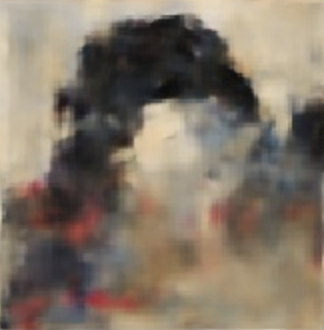

In [29]:
net = CNetwork(layers, activation_fnc=activations_fnc, alpha=alpha)
img_height, img_width, z1, z2=0
generate_image_torch(net, img_height=img_height, img_width=img_width,
                     colormode=0, alpha=alpha, z1=z1, z2=z2,
                     show=True, save=False)

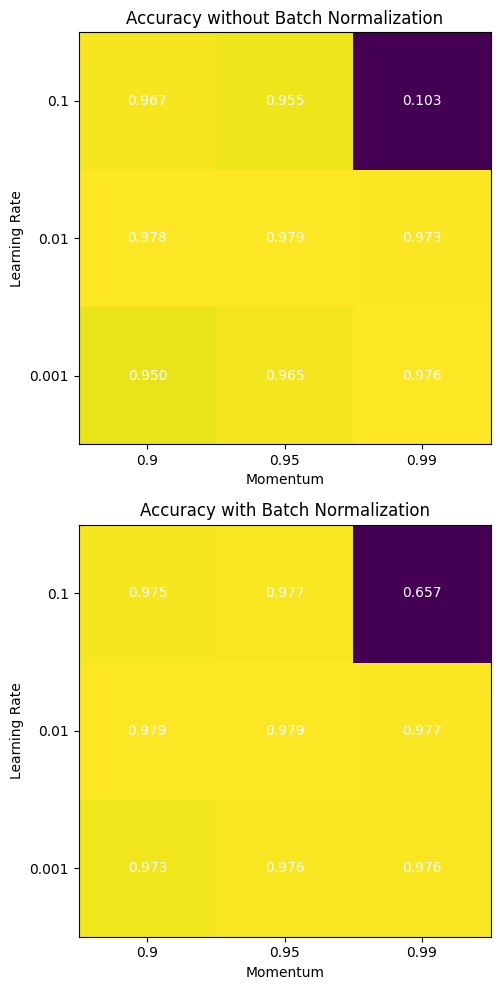

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, optimizers

def create_model(use_batch_norm=False):
    model = keras.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization() if use_batch_norm else layers.Lambda(lambda x: x),  
        layers.BatchNormalization() if use_batch_norm else layers.Lambda(lambda x: x),  
        layers.Dense(10, activation='softmax')
    ])
    return model


# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define training parameters
batch_size = 64
epochs = 10

# Define learning rates and momentums to experiment with
learning_rates = [0.001, 0.01, 0.1]
momentums = [0.9, 0.95, 0.99]

# Initialize lists to store results
accuracies_no_batch_norm = []
accuracies_with_batch_norm = []

# Loop through different configurations
for lr in learning_rates:
    for momentum in momentums:
        # Create models with and without batch normalization
        model_no_batch_norm = create_model(use_batch_norm=False)
        model_with_batch_norm = create_model(use_batch_norm=True)
        
        # Compile models with different optimizers
        optimizer_no_batch_norm = optimizers.SGD(learning_rate=lr, momentum=momentum)
        optimizer_with_batch_norm = optimizers.SGD(learning_rate=lr, momentum=momentum)
        model_no_batch_norm.compile(optimizer=optimizer_no_batch_norm, loss='categorical_crossentropy', metrics=['accuracy'])
        model_with_batch_norm.compile(optimizer=optimizer_with_batch_norm, loss='categorical_crossentropy', metrics=['accuracy'])
        
        # Train models
        history_no_batch_norm = model_no_batch_norm.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)
        history_with_batch_norm = model_with_batch_norm.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)
        
        # Evaluate models
        _, acc_no_batch_norm = model_no_batch_norm.evaluate(x_test, y_test, verbose=0)
        _, acc_with_batch_norm = model_with_batch_norm.evaluate(x_test, y_test, verbose=0)
        
        # Store accuracies
        accuracies_no_batch_norm.append(acc_no_batch_norm)
        accuracies_with_batch_norm.append(acc_with_batch_norm)

# Reshape accuracies into grids for visualization
accuracies_no_batch_norm = np.array(accuracies_no_batch_norm).reshape(len(learning_rates), len(momentums))
accuracies_with_batch_norm = np.array(accuracies_with_batch_norm).reshape(len(learning_rates), len(momentums))

# Plotting the results
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot accuracy without batch normalization
axs[0].imshow(accuracies_no_batch_norm, cmap='viridis', origin='lower')
axs[0].set_title('Accuracy without Batch Normalization')
axs[0].set_xlabel('Momentum')
axs[0].set_ylabel('Learning Rate')
axs[0].set_xticks(np.arange(len(momentums)))
axs[0].set_xticklabels(momentums)
axs[0].set_yticks(np.arange(len(learning_rates)))
axs[0].set_yticklabels(learning_rates)
for i in range(len(learning_rates)):
    for j in range(len(momentums)):
        axs[0].text(j, i, f'{accuracies_no_batch_norm[i, j]:.3f}', ha='center', va='center', color='w')

# Plot accuracy with batch normalization
axs[1].imshow(accuracies_with_batch_norm, cmap='viridis', origin='lower')
axs[1].set_title('Accuracy with Batch Normalization')
axs[1].set_xlabel('Momentum')
axs[1].set_ylabel('Learning Rate')
axs[1].set_xticks(np.arange(len(momentums)))
axs[1].set_xticklabels(momentums)
axs[1].set_yticks(np.arange(len(learning_rates)))
axs[1].set_yticklabels(learning_rates)
for i in range(len(learning_rates)):
    for j in range(len(momentums)):
        axs[1].text(j, i, f'{accuracies_with_batch_norm[i, j]:.3f}', ha='center', va='center', color='w')

plt.tight_layout()
plt.show()
